In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Problem
Đây là bài toán hồi quy tuyến tính (Regression)

Bộ dữ liệu này gồm 506 dữ liệu với 14 cột.

Đó là các trường sau:
1. CRIM: tỉ lệ tội phạm bình quan theo đầu người theo thị trấn
2. ZN: tỷ lệ đất được quy hoach cho các lô đất trên 25000 sq.ft
3. INDUS: tỷ lệ mẫu đất kinh doanh không bán lẻ trên mỗi thị trấn
4. CHAOS: Biến giả Charles River (= 1 nếu đường bao quanh sông; 0 nếu ngược lại)
5. NOX: nồng độ oxit nitric (phần trên 10 triệu)
6. RM: số lượng phòng trung bình trên một ngôi nhà
7. AGE: tỷ lệ các căn hộ có chủ sở hữu được xây dựng trước năm 1940
8. DIS: khoảng cách có trọng số đến năm trung tâm việc làm Boston
9. RAD: chỉ số khả năng tiếp cận các đường cao tốc hướng tâm
10. TAX: thuế suất tài sản toàn giá trị trên $ 10.000
11. PTRATIO: tỷ lệ học sinh-giáo viên theo thị trấn
12. B: 1000 (Bk - 0,63) ^ 2 trong đó Bk là tỷ lệ người da đen theo thị trấn
13. LSTAT: \% tình trạng dân số thấp
14. MEDV: Giá trị trung bình của những ngôi nhà có chủ sở hữu tính bằng \$ 1000

## Target
Dự đoán giá trị trung bình của những ngôi nhà có chủ sở hữu (MEDV)


In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.preprocessing import StandardScaler ,RobustScaler

In [3]:
data_dir = "/content/drive/MyDrive/Housing_Price/housing.csv"

In [4]:
#Tạo bảng với các cột và duyệt qua 5 samples
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house_data = pd.read_csv(data_dir,header = None,delimiter = r"\s+",names = column_names)
house_data.head(5)




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
#Hiển thị thông tin của các trường dữ liệu
house_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
#Tìm hiểu về các giá trị của từng trường dữ liệu
house_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
seed = 1
X_train,X_test,y_train,y_test = train_test_split(house_data.drop(["MEDV"],axis = 1),house_data["MEDV"],test_size = 0.3,random_state = seed)


In [8]:
train_data = X_train.copy()
train_data["MEDV"] = y_train
test_data = X_test.copy()
test_data['MEDV'] = y_test

train_data.to_csv("train.csv",index = False)
test_data.to_csv("test.csv",index = False)



Text(0, 0.5, 'MEDV')

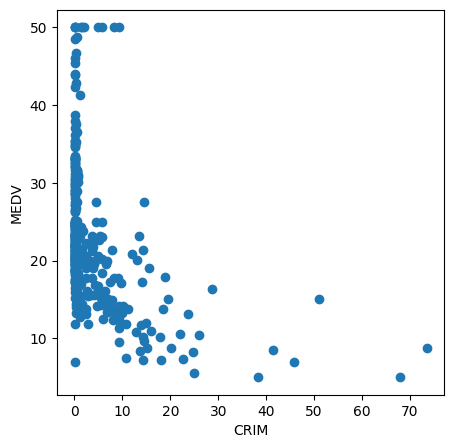

In [9]:
#Điều chỉnh size ảnh đầu ra trong plt
fig = plt.figure(figsize = (5,5))
plt.scatter(train_data["CRIM"],train_data["MEDV"])
plt.xlabel("CRIM")
plt.ylabel("MEDV")

**Nhận xét**:
- CRIM ở đây là tỉ lệ tội phạm bình quân theo đầu người theo thị trấn
- Ta thấy CRIM vs MEDV không có mối quan hệ với nhau
- Không chỉ thế, ta thấy trường CRIM khá phức tạp trong bộ dữ liệu do đó ta nên khiến nó trở nên đơn giản hơn.
Chẳng hạn như > 5% là nhiều tội phạm ta cho là 1 còn không ta để là 0 tức là ít tội phạm

Text(0, 0.5, 'MEDV')

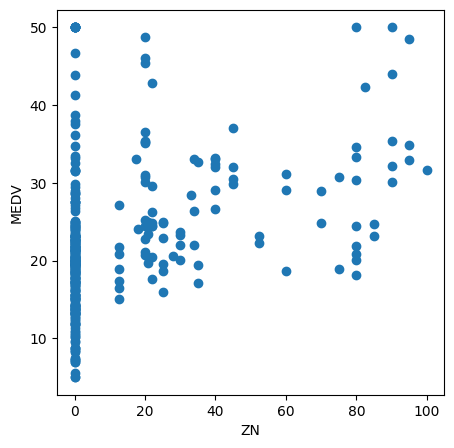

In [10]:
fig = plt.figure(figsize = (5,5))
plt.scatter(train_data["ZN"],train_data["MEDV"])
plt.xlabel("ZN")
plt.ylabel("MEDV")

Text(0, 0.5, 'MEDV')

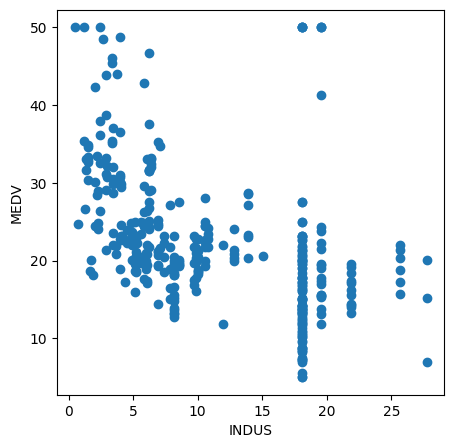

In [11]:
fig = plt.figure(figsize = (5,5))
plt.scatter(train_data["INDUS"],train_data["MEDV"])
plt.xlabel("INDUS")
plt.ylabel("MEDV")


**Nhận xét**:
- INDUS là tỉ lệ mẫu đất kinh doanh không bán lẻ ở mỗi thị trấn.
- Dựa vào scatter thì ta cx thấy INDUS không có mối quan hệ với MEDV
- Tuy nhiên ta có thể nhận thấy phần lớn thị trấn nào ms có INDUS >= 10 thì giá trị trung bình giá nhà trên thị trấn ý cx nhỏ hơn 30. Vì vậy ta có thể thử làm tương tự cách làm vs CRIM ta có thể đổi nếu INDUS >= 10 thì là số 1 còn lại là 0

Text(0, 0.5, 'MEDV')

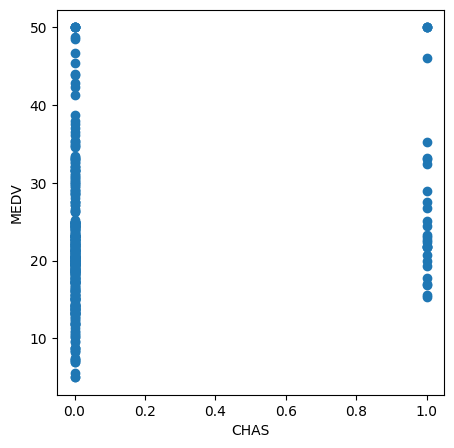

In [12]:
fig = plt.figure(figsize =(5,5))
plt.scatter(train_data['CHAS'],train_data["MEDV"])
plt.xlabel("CHAS")
plt.ylabel("MEDV")

Text(0, 0.5, 'MEDV')

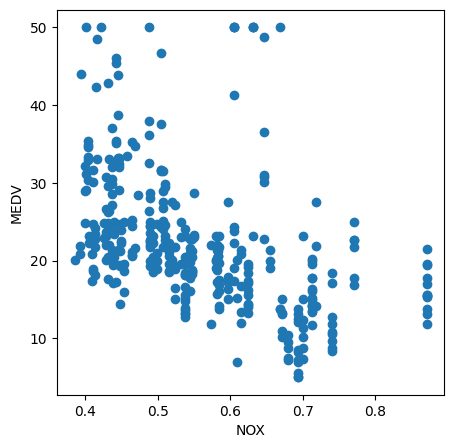

In [13]:
fig = plt.figure(figsize = (5,5))
plt.scatter(train_data["NOX"],train_data["MEDV"])
plt.xlabel("NOX")
plt.ylabel("MEDV")


**Nhận xét**:
- NOX là nồng độ oxit nitric (phần trên 10 triệu)
- Ta có thể thấy nồng độ này càng cao cụ thể trên hình là xấp xỉ 0.65 đổ lên giá tiền nhà trung bình sẽ thấp

Text(0, 0.5, 'MEDV')

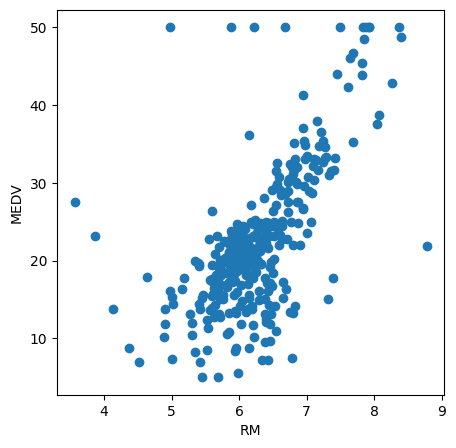

In [14]:
fig = plt.figure(figsize = (5,5))
plt.scatter(train_data["RM"],train_data["MEDV"])
plt.xlabel("RM")
plt.ylabel("MEDV")

**Nhận xét**
 - RM là số lượng phòng trung bình trên mỗi ngôi nhà
 - Ta có thể thấy RM và MEDV có mối quan hệ tuyến tính với nhau
 - Nếu RM tăng thì MEDV cũng sẽ tăng

Text(0, 0.5, 'MEDV')

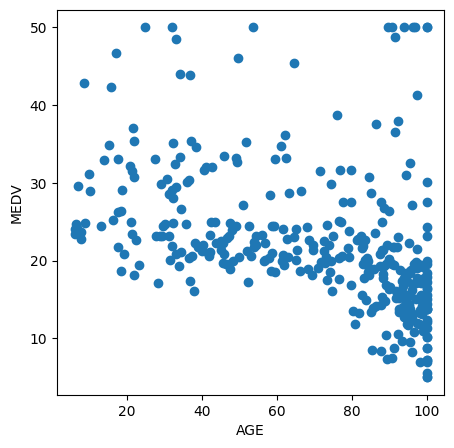

In [15]:
fig = plt.figure(figsize =(5,5))
plt.scatter(train_data["AGE"],train_data["MEDV"])
plt.xlabel("AGE")
plt.ylabel("MEDV")

**Nhận xét**
- AGE là tỉ lệ căn hộ có chủ sở hữu trước năm 1940
- Trong trường hợp này AGE không có mối quan hệ với MEDV

Text(0, 0.5, 'MEDV')

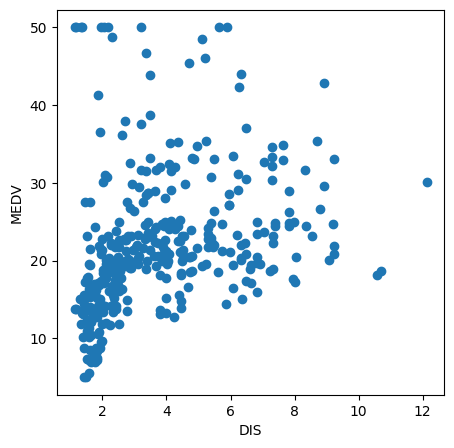

In [16]:
fig = plt.figure(figsize = (5,5))
plt.scatter(train_data['DIS'],train_data["MEDV"])
plt.xlabel("DIS")
plt.ylabel("MEDV")


Text(0, 0.5, 'MEDV')

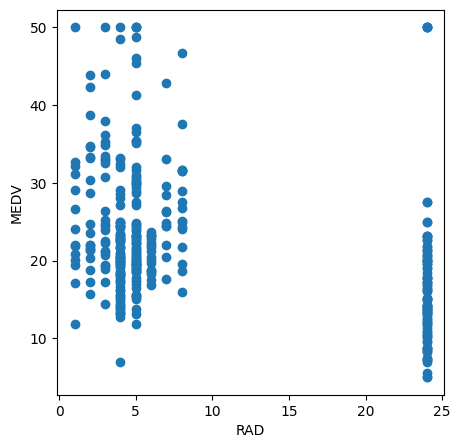

In [17]:
fig = plt.figure(figsize = (5,5))
plt.scatter(train_data["RAD"],train_data["MEDV"])
plt.xlabel("RAD")
plt.ylabel("MEDV")

Text(0, 0.5, 'MEDV')

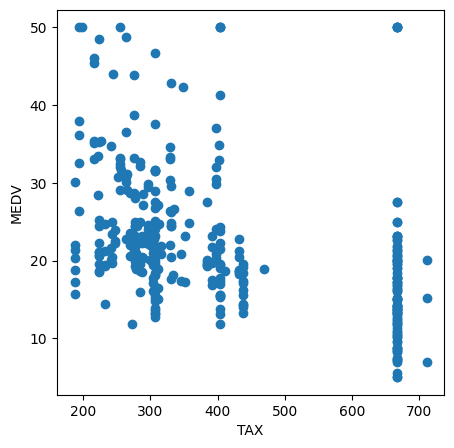

In [18]:
fig = plt.figure(figsize = (5, 5))
plt.scatter(train_data["TAX"], train_data["MEDV"])
plt.xlabel("TAX")
plt.ylabel("MEDV")

Text(0, 0.5, 'MEDV')

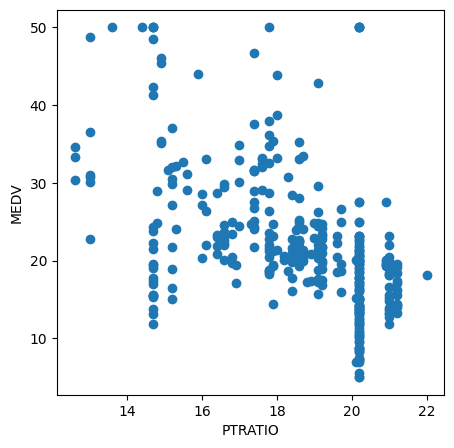

In [19]:
fig = plt.figure(figsize = (5, 5))
plt.scatter(train_data["PTRATIO"], train_data["MEDV"])
plt.xlabel("PTRATIO")
plt.ylabel("MEDV")

Text(0, 0.5, 'MEDV')

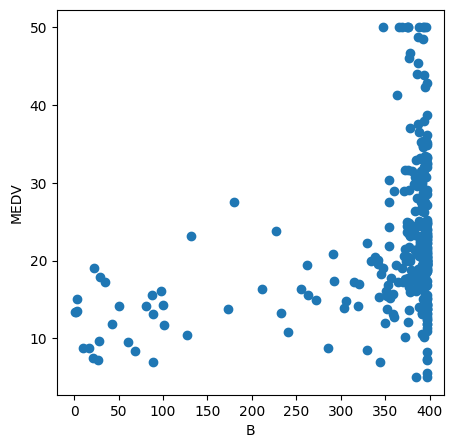

In [20]:
fig = plt.figure(figsize = (5, 5))
plt.scatter(train_data["B"], train_data["MEDV"])
plt.xlabel("B")
plt.ylabel("MEDV")

Text(0, 0.5, 'MEDV')

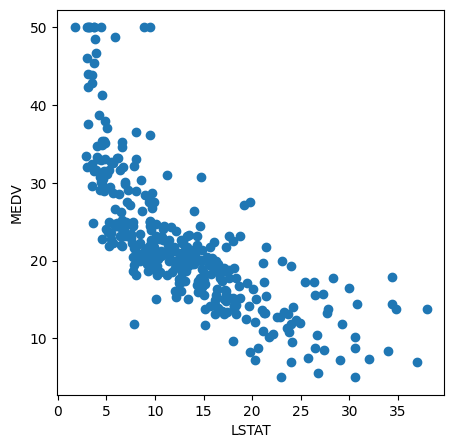

In [21]:
fig = plt.figure(figsize = (5, 5))
plt.scatter(train_data["LSTAT"], train_data["MEDV"])
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

**Nhận xét**
- LSTAT là % tình trạng dân số thấp
- Ta có thể thấy LSTAT và MEDV có mỗi quan hệ tuyến tính với nhau
- Nếu LSTAT tăng thì MEDV có xu hướng giảm

## Ma trận hệ số tương quan với heatmap
Chúng ta có thể sử dụng hàm heatmap trong seaborn để vẽ ma trận hệ số tương quan giữa các trường trong bảng.

Vậy hệ số tương quan là gì ??? Không nói về mặt tính toán trong toán học.

Hệ số tương quan theo cách hiểu đơn giản là xem xét mối quan hệ giữa hai trường với nhau nếu có giá trị càng gần hai cận 1 hoặc -1 thì giữa chúng nó càng liên quan tuyến tính với nhau.

Cụ thể coi hệ số là a với hai biến ngẫu nhiên là X và Y
- nếu a > 0 thì tương quan thuận
- nếu a < 0 thì tương quan nghịch
- nếu a = 0 thì không có gì hết
- nếu a = +- 1 thì tương quan tuyến tính như Y = cX + d

Chính vì thế ta có thể dùng ma trận hệ số tương quan này để cắt bỏ bớt 1 số trường không cần thiết.

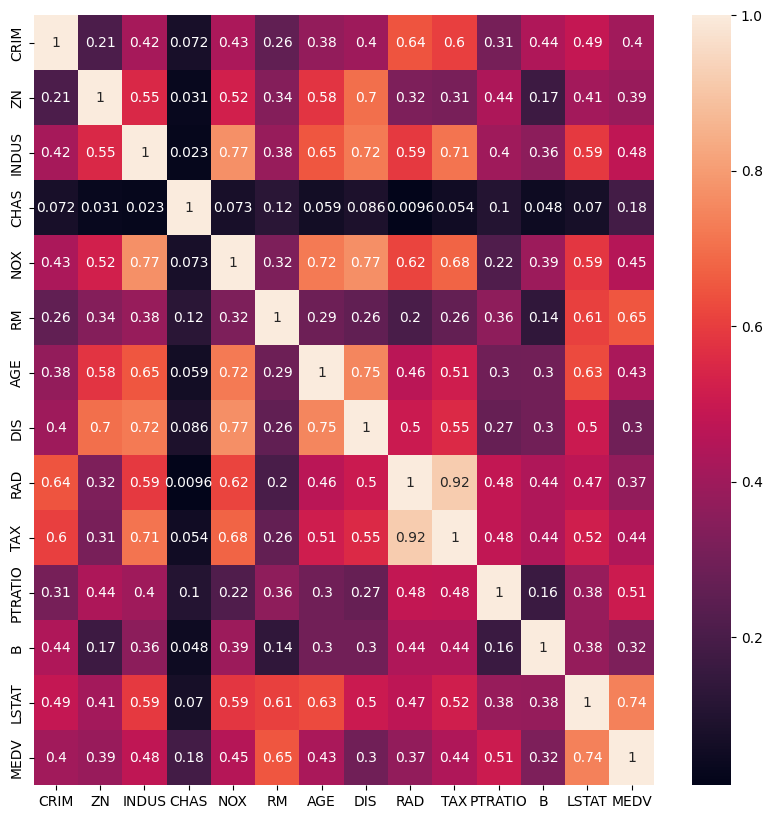

In [22]:
plt.figure(figsize= (10,10))
sns.heatmap(train_data.corr().abs(),annot= True)
plt.show()

In [23]:
def drop_with_high_corr(table, threshold):
    # Lấy giá trị tuyệt đối các giá trị trong bảng
    corr_matrix = table.corr().abs()
    # Tính trung bình hệ số tương quan cho mỗi trường đối với trường còn lại
    avg_corr_matrix = corr_matrix.mean(axis = 1)
    # Tạo ma trận tam giác trên từ corr_matrix
    up = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # List các cột xóa
    drop_columns = list()

    for row in range(len(up)-1):
        col_idx = row + 1
        # row != col
        for col in range (col_idx, len(up) - 1):
            if(corr_matrix.iloc[row, col] > threshold):
                # Chọn đặc trưng nào có trung bình hệ số tương quan lớn hơn
                if(avg_corr_matrix.iloc[row] > avg_corr_matrix.iloc[col]):
                    drop_columns.append(row)
                else:
                    drop_columns.append(col)

    # Dùng set để khiến mỗi phân tử bên trong mảng drop là duy nhất
    drop_set = list(set(drop_columns))
    dropcols_names = list(table.columns[[item for item in drop_set]])

    return dropcols_names

### Dữ liệu gốc

In [24]:
#sử dụng dữ liệu gốc
X,y = train_data.drop(["MEDV"],axis = 1),train_data["MEDV"]
X_test ,y_test = test_data.drop(["MEDV"],axis = 1),test_data["MEDV"]
#chuẩn hóa dữ liệu
scaler = StandardScaler()
transform = scaler.fit(X)
X = transform.transform(X)
X_test = transform.transform(X_test)


In [25]:
#sử dụng mô hình linear Regression
linear = LinearRegression()
linear.fit(X,y)

#xem kết quả với tập train và test
print('1. Linear Regression')
print("Train MSE linear : %.2f" % mean_squared_error(y,linear.predict(X)))
print("Test MSE linear :%.2f" % mean_squared_error(y_test,linear.predict(X_test)))
print("----------------------------------------")
#sử dụng mô hình KNN
knn = KNN()
knn.fit(X,y)
#xem kết quả của tập train và tập test
print('2.KNN')
print("Train MSE linear : %.2f" % mean_squared_error(y,knn.predict(X)))
print("Test MSE linear : %.2f" % mean_squared_error(y_test,knn.predict(X_test)))


1. Linear Regression
Train MSE linear : 23.51
Test MSE linear :19.83
----------------------------------------
2.KNN
Train MSE linear : 14.99
Test MSE linear : 17.04


## Dữ liệu sau quá trình phân tích

In [26]:
def thresh_func(table,col,threshold):
    new_value =[]
    for value in table[col]:
        if value >= threshold :
            new_value.append(1)
        else :
            new_value.append(0)
    return pd.Series(new_value)

In [27]:
# Loại bỏ một số trường không cần thiết
drop_columns = drop_with_high_corr(train_data, 0.8)
print(drop_columns)

trainV2 = train_data.drop(drop_columns, axis = 1)
testV2 = test_data.drop(drop_columns, axis = 1)


['TAX']


In [ ]:

# CRIM
trainV2["CRIM"] = thresh_func(trainV2, "CRIM", 5)
testV2["CRIM"] = thresh_func(testV2, "CRIM", 5)

# INDUS
trainV2["INDUS"] = thresh_func(trainV2, "INDUS", 10)
testV2["INDUS"] = thresh_func(testV2, "INDUS", 10)

# NOX
trainV2["NOX"] = thresh_func(trainV2, "NOX", 0.65)
testV2["NOX"] = thresh_func(testV2, "NOX", 0.65)

# AGE
trainV2["AGE"] = thresh_func(trainV2, "AGE", 80)
testV2["AGE"] = thresh_func(testV2, "AGE", 80)

X, y = trainV2.drop(["MEDV"], axis=1), trainV2["MEDV"]
X_test, y_test = testV2.drop(["MEDV"], axis=1), testV2["MEDV"]

# Normalize dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)
# Sử dụng mô hình Linear Regression
linear = LinearRegression()
linear.fit(X, y)

# Xem kết quả với tập train và test
print("1. Linear Regression")
print("Train MSE linear: %.2f" % mean_squared_error(y, linear.predict(X)))
print("Test MSE linear: %.2f" % mean_squared_error(y_test, linear.predict(X_test)))
print("----------------------------------------------")

# Sử dụng mô hình KNN
knn = KNN()
knn.fit(X, y)

# Xem kết quả với tập train và test
print("2. KNN")
print("Train MSE linear: %.2f" % mean_squared_error(y, knn.predict(X)))
print("Test MSE linear: %.2f" % mean_squared_error(y_test, knn.predict(X_test)))
print("----------------------------------------------")

### Thêm 1: Chọn feature bằng sklearn (Forward Feature Selection by sklearn)

In [32]:
X,y = train_data.drop(['MEDV'],axis =1),train_data['MEDV']

In [33]:
#lấy một feature rồi tăng dần đến khi mô hình đạt tối ưu
from sklearn.feature_selection import f_regression
f_val ,p_val = f_regression(X,y)

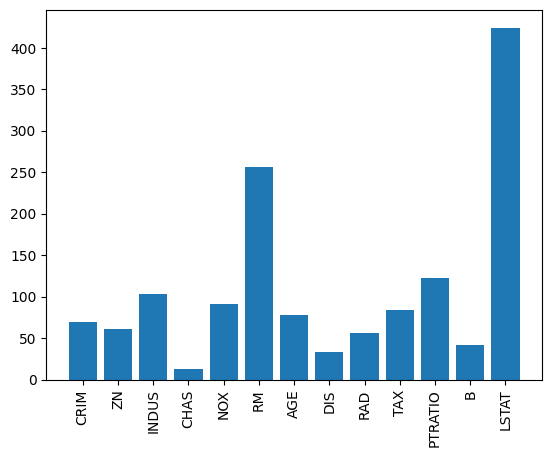

In [37]:
plt.bar(train_data.drop("MEDV",axis = 1).columns,f_val)
plt.xticks(rotation = 90)
plt.show()

In [39]:
# Top 5 các trường đóng góp nhiều nhất
trainV3 = train_data[["RM", "LSTAT", "PTRATIO", "INDUS", "TAX", "MEDV"]]
testV3 = test_data[["RM", "LSTAT", "PTRATIO", "INDUS", "TAX", "MEDV"]]

X, y = trainV3.drop(["MEDV"], axis = 1), trainV3["MEDV"]
X_test, y_test = testV3.drop(["MEDV"], axis = 1), testV3["MEDV"]

# INDUS
trainV3["INDUS"] = thresh_func(trainV3, "INDUS", 10)
testV3["INDUS"] = thresh_func(testV3, "INDUS", 10)

# Normalize dữ liệu
scaler = StandardScaler()
transform = scaler.fit(X)
X = transform.transform(X)
X_test = transform.transform(X_test)

# Sử dụng mô hình Linear Regression
linear = LinearRegression()
linear.fit(X, y)

# Xem kết quả với tập train và test
print("1. Linear Regression")
print("Train MSE linear: %.2f" % mean_squared_error(y, linear.predict(X)))
print("Test MSE linear: %.2f" % mean_squared_error(y_test, linear.predict(X_test)))
print("----------------------------------------------")

# Sử dụng mô hình KNN
knn = KNN()
knn.fit(X, y)

# Xem kết quả với tập train và test
print("2. KNN")
print("Train MSE linear: %.2f" % mean_squared_error(y, knn.predict(X)))
print("Test MSE linear: %.2f" % mean_squared_error(y_test, knn.predict(X_test)))
print("----------------------------------------------")

1. Linear Regression
Train MSE linear: 28.33
Test MSE linear: 25.15
----------------------------------------------
2. KNN
Train MSE linear: 11.41
Test MSE linear: 14.69
----------------------------------------------


<ipython-input-39-9e8c24de8d60>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainV3["INDUS"] = thresh_func(trainV3, "INDUS", 10)
<ipython-input-39-9e8c24de8d60>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testV3["INDUS"] = thresh_func(testV3, "INDUS", 10)


###  2: Linear and Ridge Regression code by hand

In [40]:
#Phương thức khởi tạo lớp
class MyLinearRegression:

  def __init__(self):
    #lưu trữ các hệ số hồi quy
    self.weight = None

  def mse_loss(self, y_true, y_pred):
    #tính toán và trả về giá trị MSE giữa giá trị thực tế "y_true" và giá trị dự đoán "y_pred"
    return mean_squared_error(y_true, y_pred)
  #huấN luyện mô hình hồi quy tuyến tính
  def fit(self, X, y):
    #đầu vào ma trận đặc trưng X và vecto giá trị mục tiêu y
    X = X.reshape((X.shape[1], X.shape[0]))
    y = y.to_numpy().reshape((-1, 1))
    self.weight = np.dot(np.linalg.pinv(X.dot(X.T)), X.dot(y))
    return self.weight

  def get_weight(self): #trả về hệ số của mô hình hồi quy sau khi đã huấn luyện
    return self.weight

  def predict(self, X): #dự đoán giá trị đầu ra dựa trên ma trận đặc trưng"X"
    X = X.reshape((X.shape[1], X.shape[0]))
    if self.weight is None:
      # kiểm tra xem mô hình được huấn luyện hay chưa ?
      raise ValueError("You need to fit the model!!!")
    else:
      return X.T.dot(self.weight)

  def evaluate(self, X, y): #tính toán và trả về giá trị MSE giữa giá trị thực tế "y" và giá trị dự đoán "X"
    if self.weight is None:
      raise ValueError("You need to fit the model!!!")
    return self.mse_loss(y, self.predict(X))

class MyRidgeRegression(MyLinearRegression): #kế thừa từ lớp cha

  def __init__(self, lamda):
    super(MyRidgeRegression, self).__init__()
    self.lamda = lamda

  def mse_loss(self, y_true, y_pred):
    return mean_squared_error(y_true, y_pred) + self.lamda*np.sum(self.weight**2)

  def fit(self, X, y):
    X = X.reshape((X.shape[1], X.shape[0]))
    y = y.to_numpy().reshape((-1, 1))

    A = X.dot(X.T)
    I = np.eye(A.shape[0], A.shape[1])*self.lamda
    self.weight = np.dot(np.linalg.inv(A + I), X.dot(y))
    return self.get_weight()